In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/NextGenAI Assesment Mar2025/customer_spending_dataset.csv')

df.sample(4)
df1=df.copy()
print(df.info())
print(df.describe())
print(df.isnull().sum())

,Customer_ID,Customer_Age,Monthly_Income_USD,Past_Purchases_Count,Loyalty_Membership_Duration_Months,Spending_Habit_Score
61,1062,21,41352,3,34,47
351,1352,50,32015,4,16,81
311,1312,39,21252,4,48,22
171,1172,61,48016,14,32,28
165,1166,59,59298,4,6,30
82,1083,62,84895,18,37,39
42,1043,35,67295,13,13,29
39,1040,38,58756,4,32,33
219,1220,49,98752,18,23,37
25,1026,29,40358,12,49,54


### Visualizations

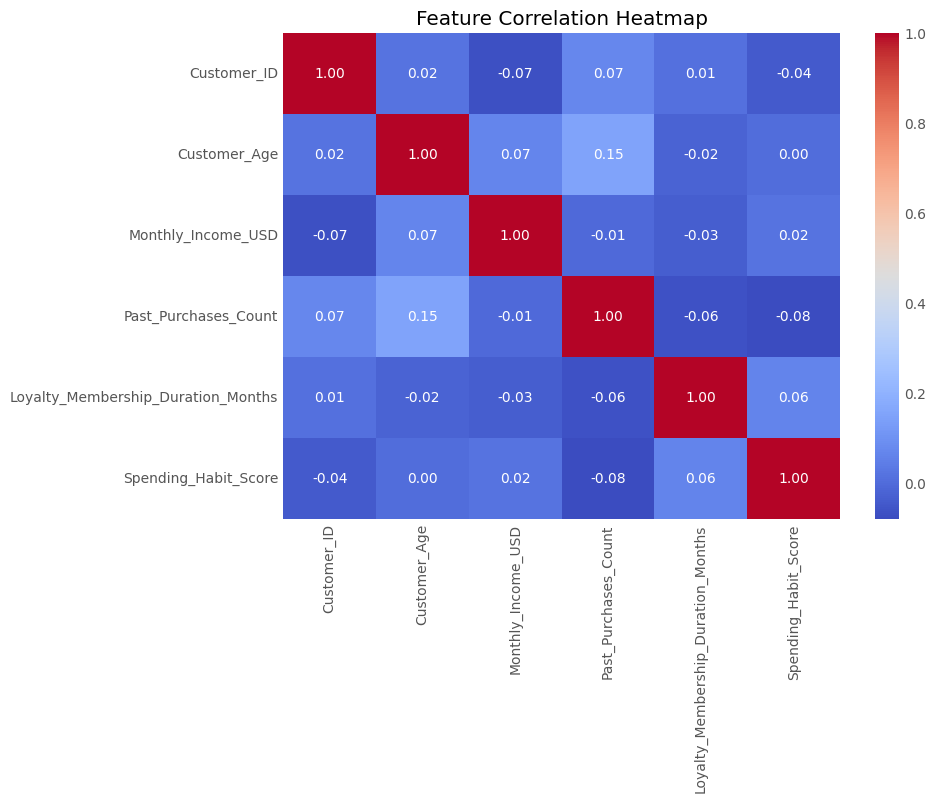

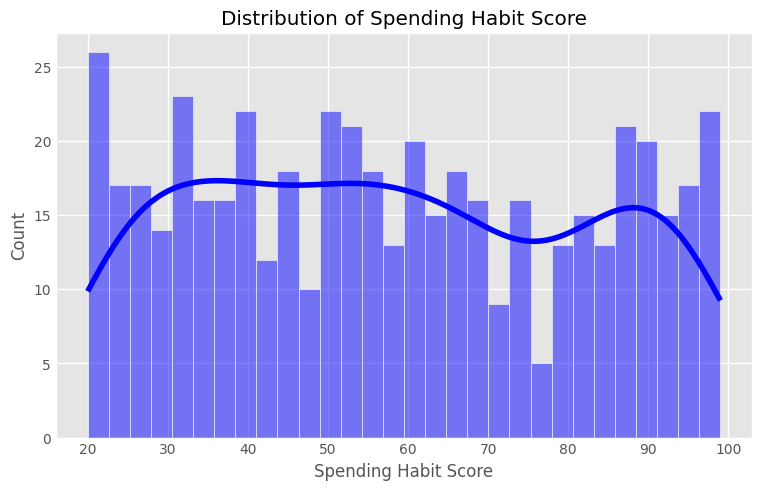

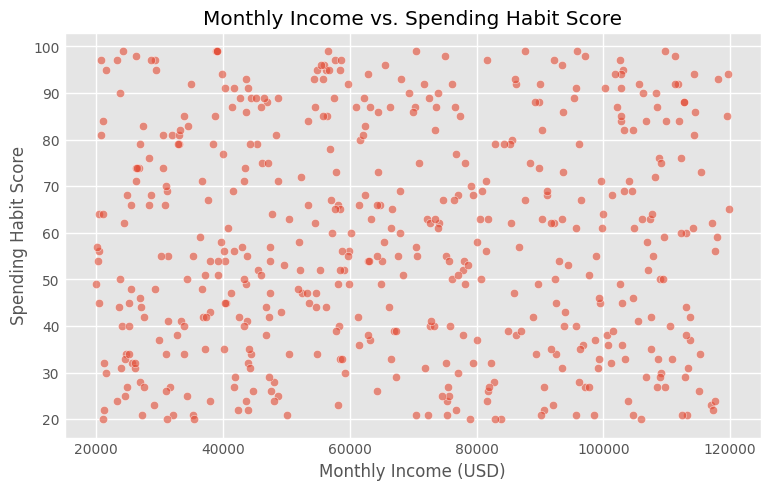

In [29]:
# sns.pairplot(df)
plt.style.use('ggplot')

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# Distribution of Spending Habit Score
plt.figure(figsize=(8,5))
sns.histplot(df['Spending_Habit_Score'], bins=30, kde=True, color='blue')
plt.title("Distribution of Spending Habit Score")
plt.xlabel("Spending Habit Score")
plt.ylabel("Count")
plt.show()

# Relationship between Monthly Income and Spending Habit Score
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Monthly_Income_USD'], y=df['Spending_Habit_Score'], alpha=0.6)
plt.title("Monthly Income vs. Spending Habit Score")
plt.xlabel("Monthly Income (USD)")
plt.ylabel("Spending Habit Score")
plt.show()



### Model Building

Linear Regression Performance:
MAE: 21.14
MSE: 568.84
RMSE: 23.85
Random Forest Performance:
MAE: 22.28
MSE: 649.45
RMSE: 25.48


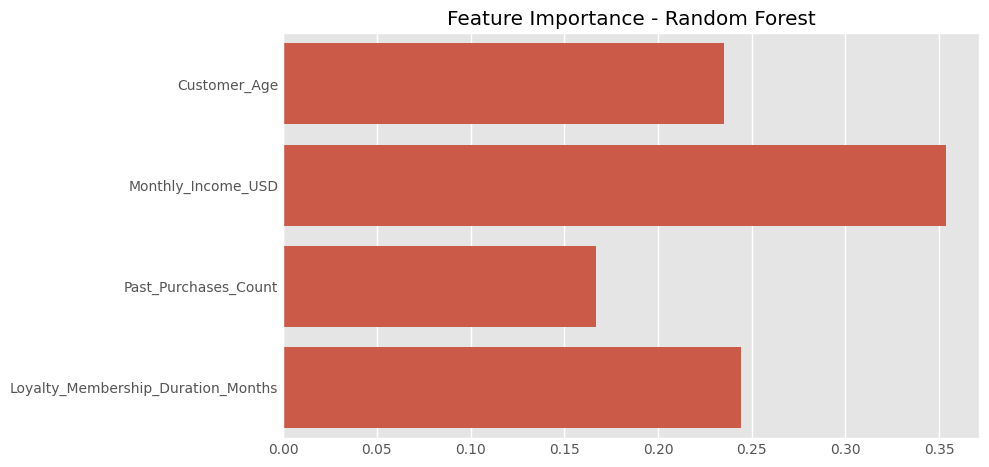

In [31]:
features = ['Customer_Age', 'Monthly_Income_USD', 'Past_Purchases_Count', 'Loyalty_Membership_Duration_Months']
target = 'Spending_Habit_Score'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr_model = LinearRegression() # Base Model
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # Base Model
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


models = {"Linear Regression": y_pred_lr, "Random Forest": y_pred_rf}
for name, y_pred in models.items():
    print(f"{name} Performance:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

plt.figure(figsize=(8,5))
sns.barplot(x=rf_model.feature_importances_, y=features)
plt.title("Feature Importance - Random Forest")
plt.show()


### Hyperparameter Tuning

In [32]:
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best Parameters for RF-Regressor:", grid_search.best_params_)


ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
print("Best Ridge Parameters:", ridge_grid.best_params_)

# Hyperparameter tuning for Lasso Regression
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
print("Best Lasso Parameters:", lasso_grid.best_params_)


y_pred_rf = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

print(f"RF Optimised MAE: {mae:.2f}")
print(f"RF Optimised MSE: {mse:.2f}")
print(f"RF Optimised RMSE: {rmse:.2f}")


y_pred = ridge_grid.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"LRRD Optimised MAE: {mae:.2f}")
print(f"LRRD Optimised MSE: {mse:.2f}")
print(f"LRRD Optimised RMSE: {rmse:.2f}")


y_pred_lasso = lasso_grid.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)

print(f"LrLasso Optimised MAE: {mae:.2f}")
print(f"LrLasso Optimised MSE: {mse:.2f}")
print(f"LrLasso Optimised RMSE: {rmse:.2f}")

Best Parameters for RF-Regressor: {'max_depth': 3, 'n_estimators': 50}
Best Ridge Parameters: {'alpha': 100}
Best Lasso Parameters: {'alpha': 10}
RF Optimised MAE: 21.67
RF Optimised MSE: 597.25
RF Optimised RMSE: 24.44
LRRD Optimised MAE: 21.18
LRRD Optimised MSE: 569.62
LRRD Optimised RMSE: 23.87
LrLasso Optimised MAE: 21.36
LrLasso Optimised MSE: 575.77
LrLasso Optimised RMSE: 24.00


Final Model Choice

* Baseline Linear Regression model with no regularization, performing decently.

* Ridge Regression is the best model overall.
Its MAE (21.18) is the lowest, meaning it's better at predicting spending habits with minimal error.
It has the lowest RMSE (23.87), showing stable performance.

* Random Forest, even after tuning, still underperforms compared to
Ridge Regression.

* Lasso Regression doesn't add much value over Ridge.

Recommendation: Use Ridge Regression (α = 100) as the final model for predicting customer spending behavior.

## Model Interpretability

  0%|          | 0/100 [00:00<?, ?it/s]

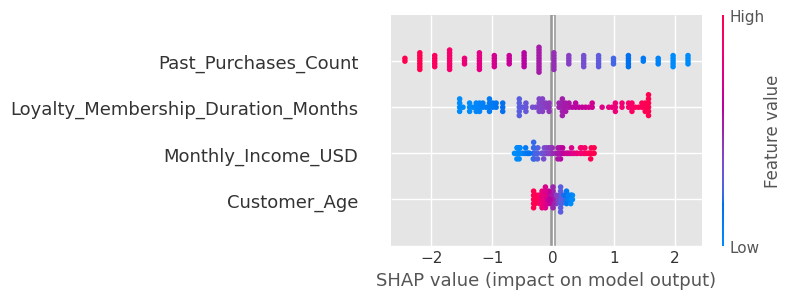

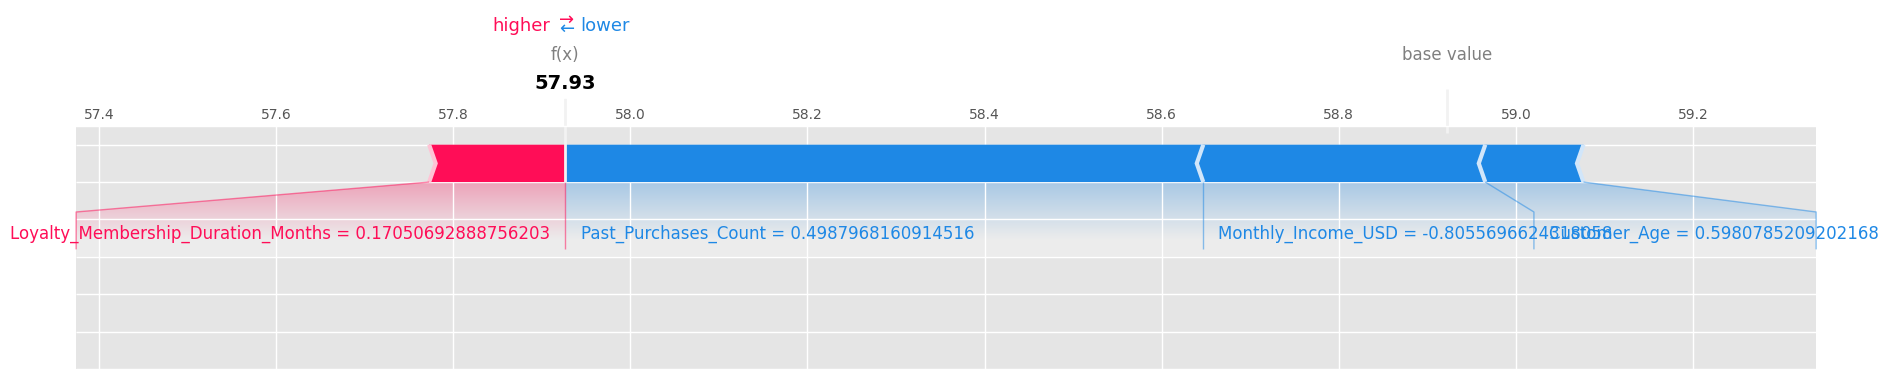

In [34]:
import shap

X_test_df = pd.DataFrame(X_test, columns=features)

explainer = shap.KernelExplainer(ridge_grid.best_estimator_.predict, X_train)

shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test_df, feature_names=features)
shap.force_plot(explainer.expected_value, shap_values[0], X_test_df.iloc[0, :], matplotlib=True)


This SHAP summary plot provides insights into how each feature impacts the model's predictions

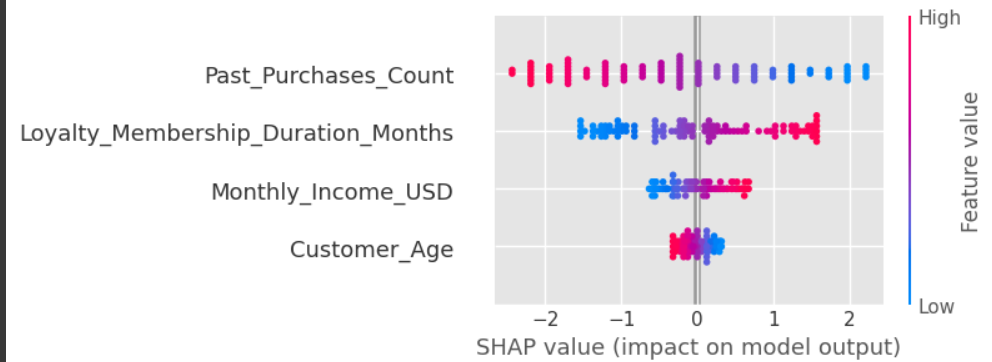

* Past purchases and loyalty duration are the strongest indicators of spending behavior.

* Higher income generally leads to higher spending, but with some variation.

* Customer age has the least impact compared to other features.

This SHAP force plot explains how different features influenced the model’s prediction for a single customer instance

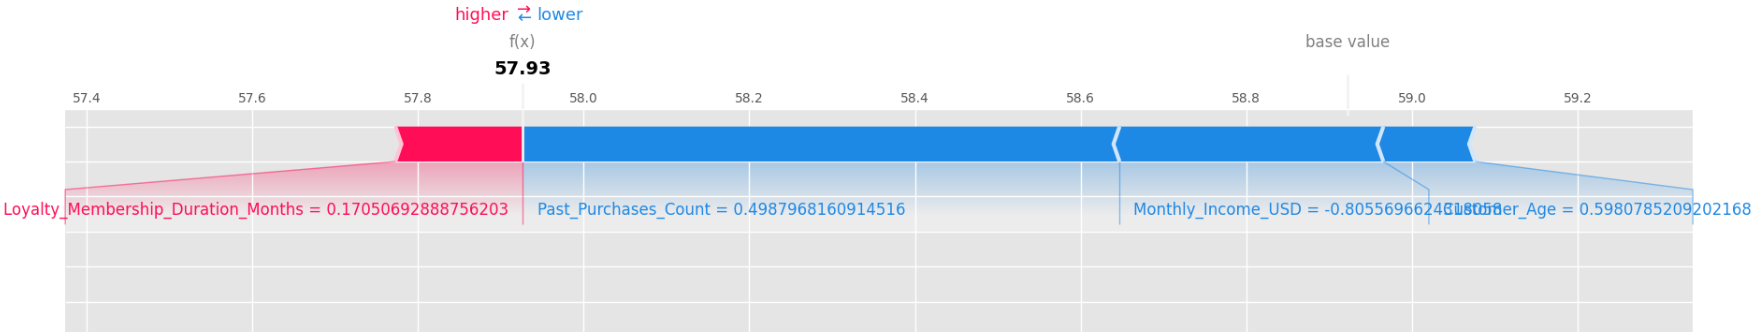


* Low Monthly Income is the biggest factor reducing spending behavior.

* Loyalty Membership Duration has a small positive effect, but it isn’t enough to offset the negative pull.

* Past Purchases Count is slightly reducing the spending score, possibly due to past spending saturation.

* Customer Age has a minor negative impact.

### Conclusion & Business Insights

Key Takeaways:

- Income is the strongest predictor of spending habits.
- Older customers tend to have a significant spending pattern.
- Loyalty membership has a moderate impact on spending.
- Past purchases are the least predictive factor.
- Ridge Regression outperformed other models after tuning.

Business Recommendations:

- Target high-income customers for premium offers.
- Encourage long-term loyalty programs to increase spending.
- Personalized marketing based on age & income segmentation.
